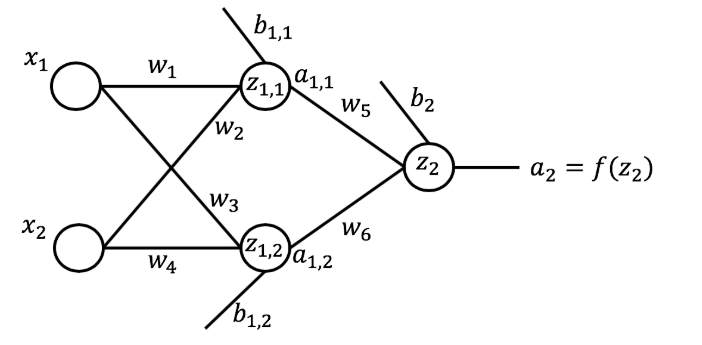

In [1]:
import numpy as np # import Numpy library to generate 

weights = np.around(np.random.uniform(size=6), decimals=2) # initialize the weights
biases = np.around(np.random.uniform(size=3), decimals=2) # initialize the biases

In [2]:
print(weights)
print(biases)

[0.89 0.79 0.13 0.33 0.49 0.58]
[0.56 0.61 0.3 ]


In [3]:
x_1 = 0.5 # input 1
x_2 = 0.85 # input 2

print('x1 is {} and x2 is {}'.format(x_1, x_2))

x1 is 0.5 and x2 is 0.85


In [4]:
z_11 = x_1 * weights[0] + x_2 * weights[1] + biases[0]

print('The weighted sum of the inputs at the first node in the hidden layer is {}'.format(z_11))

The weighted sum of the inputs at the first node in the hidden layer is 1.6765


In [5]:
z_12 = x_1 * weights[2] + x_2 * weights[3] + biases[1]
print('The weighted sum of the inputs at the second node in the hidden layer is {}'.format(z_12))

The weighted sum of the inputs at the second node in the hidden layer is 0.9555


In [6]:
a_11 = 1.0 / (1.0 + np.exp(-z_11))

print('The activation of the first node in the hidden layer is {}'.format(np.around(a_11, decimals=4)))

The activation of the first node in the hidden layer is 0.8424


In [7]:
a_12 = 1.0 / (1.0 + np.exp(-z_12))

print('The activation of the second node in the hidden layer is {}'.format(np.around(a_12, decimals=4)))

The activation of the second node in the hidden layer is 0.7222


In [8]:
z_2 = a_11 * weights[4] + a_12 * weights[5] + biases[2]

print('The weighted sum of the inputs at the node in the output layer is {}'.format(np.around(z_2, decimals=4)))

The weighted sum of the inputs at the node in the output layer is 1.1317


In [9]:
a_2 = 1.0 / (1.0 + np.exp(-z_2))

print('The output of the network for x1 = 0.5 and x2 = 0.85 is {}'.format(np.around(a_2, decimals=4)))

The output of the network for x1 = 0.5 and x2 = 0.85 is 0.7561


## Build a Neural Network

In [10]:
n = 2 # number of inputs
num_hidden_layers = 2 # number of hidden layers
m = [2, 2] # number of nodes in each hidden layer
num_nodes_output = 1 # number of nodes in the output layer

In [11]:
import numpy as np # import the Numpy library

num_nodes_previous = n # number of nodes in the previous layer

network = {} # initialize network an an empty dictionary

# loop through each layer and randomly initialize the weights and biases associated with each node
# notice how we are adding 1 to the number of hidden layers in order to include the output layer
for layer in range(num_hidden_layers + 1): 
    
    # determine name of layer
    if layer == num_hidden_layers:
        layer_name = 'output'
        num_nodes = num_nodes_output
    else:
        layer_name = 'layer_{}'.format(layer + 1)
        num_nodes = m[layer]
    
    # initialize weights and biases associated with each node in the current layer
    network[layer_name] = {}
    for node in range(num_nodes):
        node_name = 'node_{}'.format(node+1)
        network[layer_name][node_name] = {
            'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
            'bias': np.around(np.random.uniform(size=1), decimals=2),
        }
    
    num_nodes_previous = num_nodes
    
print(network) # print network

{'layer_1': {'node_1': {'weights': array([0.56, 0.97]), 'bias': array([0.46])}, 'node_2': {'weights': array([0.94, 0.17]), 'bias': array([0.24])}}, 'layer_2': {'node_1': {'weights': array([0.82, 0.27]), 'bias': array([0.45])}, 'node_2': {'weights': array([0.01, 0.64]), 'bias': array([0.71])}}, 'output': {'node_1': {'weights': array([0.81, 0.23]), 'bias': array([0.35])}}}


In [12]:
def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):
    
    num_nodes_previous = num_inputs # number of nodes in the previous layer

    network = {}
    
    # loop through each layer and randomly initialize the weights and biases associated with each layer
    for layer in range(num_hidden_layers + 1):
        
        if layer == num_hidden_layers:
            layer_name = 'output' # name last layer in the network output
            num_nodes = num_nodes_output
        else:
            layer_name = 'layer_{}'.format(layer + 1) # otherwise give the layer a number
            num_nodes = num_nodes_hidden[layer] 
        
        # initialize weights and bias for each node
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node+1)
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2),
            }
    
        num_nodes_previous = num_nodes

    return network # return the network

Use the initialize_network function to create a network that:
1. takes 5 inputs
2. has three hidden layers
3. has 3 nodes in the first layer, 2 nodes in the second layer, and 3 nodes in the third layer
4. has 1 node in the output layer
Call the network small_network.

In [13]:
small_network = initialize_network(5, 3, [3, 2, 3], 1)

In [14]:
def compute_weighted_sum(inputs, weights, bias):
    return np.sum(inputs * weights) + bias

In [15]:
from random import seed
import numpy as np

np.random.seed(12)
inputs = np.around(np.random.uniform(size=5), decimals=2)

print('The inputs to the network are {}'.format(inputs))

The inputs to the network are [0.15 0.74 0.26 0.53 0.01]


In [16]:
node_weights = small_network['layer_1']['node_1']['weights']
node_bias = small_network['layer_1']['node_1']['bias']

weighted_sum = compute_weighted_sum(inputs, node_weights, node_bias)
print('The weighted sum at the first node in the hidden layer is {}'.format(np.around(weighted_sum[0], decimals=4)))

The weighted sum at the first node in the hidden layer is 2.0316


In [17]:
def node_activation(weighted_sum):
    return 1.0 / (1.0 + np.exp(-1 * weighted_sum))

In [18]:
node_output  = node_activation(compute_weighted_sum(inputs, node_weights, node_bias))
print('The output of the first node in the hidden layer is {}'.format(np.around(node_output[0], decimals=4)))

The output of the first node in the hidden layer is 0.8841


## Forward Propagation

In [19]:
def forward_propagate(network, inputs):
    
    layer_inputs = list(inputs) # start with the input layer as the input to the first hidden layer
    
    for layer in network:
        
        layer_data = network[layer]
        
        layer_outputs = [] 
        for layer_node in layer_data:
        
            node_data = layer_data[layer_node]
        
            # compute the weighted sum and the output of each node at the same time 
            node_output = node_activation(compute_weighted_sum(layer_inputs, node_data['weights'], node_data['bias']))
            layer_outputs.append(np.around(node_output[0], decimals=4))
            
        if layer != 'output':
            print('The outputs of the nodes in hidden layer number {} is {}'.format(layer.split('_')[1], layer_outputs))
    
        layer_inputs = layer_outputs # set the output of this layer to be the input to next layer

    network_predictions = layer_outputs
    return network_predictions

In [20]:
predictions = forward_propagate(small_network, inputs)
print('The predicted value by the network for the given input is {}'.format(np.around(predictions[0], decimals=4)))

The outputs of the nodes in hidden layer number 1 is [np.float64(0.8841), np.float64(0.8801), np.float64(0.7555)]
The outputs of the nodes in hidden layer number 2 is [np.float64(0.8236), np.float64(0.7822)]
The outputs of the nodes in hidden layer number 3 is [np.float64(0.7389), np.float64(0.7023), np.float64(0.766)]
The predicted value by the network for the given input is 0.8835


In [21]:
my_network = initialize_network(5, 3, [2, 3, 2], 3)

In [22]:
inputs = np.around(np.random.uniform(size=5), decimals=2)

In [23]:
predictions = forward_propagate(my_network, inputs)
print('The predicted values by the network for the given input are {}'.format(predictions))

The outputs of the nodes in hidden layer number 1 is [np.float64(0.8857), np.float64(0.8889)]
The outputs of the nodes in hidden layer number 2 is [np.float64(0.7822), np.float64(0.6965), np.float64(0.7411)]
The outputs of the nodes in hidden layer number 3 is [np.float64(0.868), np.float64(0.881)]
The predicted values by the network for the given input are [np.float64(0.8952), np.float64(0.8222), np.float64(0.8035)]
